# Chemical Property Modelling in association with asktalos.com and UltraTech Cement Limited and Aditya Birla Group

### Akshay B
### 12th March 2023 Batch

### Problem Statement
Predicting Compressive Strength of Concrete given its age and quantitative measurements of ingredients.

### Attribute information
### Inputs
1. Material Quantity (gm)
2. Additive Catalyst (gm)
3. Ash Component (gm)
4. Water Mix (ml)
5. Plasticizer (gm)
6. Moderate Aggregator
7. Refined Aggregator
8. Formulation Duration (hrs)

### Output
* Concrete Compressive Strength (Mpa)



In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("updated_dataset.csv")

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8
0,0.684217,-0.128461,-1.255480,-0.547771,-0.146964,1.569387,-0.917180,1.515336,1.463677
1,-1.690804,0.473003,0.994856,-1.168004,-0.998353,0.945039,1.770596,-1.330614,0.161067
2,1.178929,-1.472644,-0.016248,1.713048,-0.506901,0.268766,-0.006944,0.552617,1.332054
3,0.045295,1.160445,-0.500575,1.807521,0.103089,1.401555,0.622357,0.292255,0.935241
4,0.067828,1.172241,1.114671,0.270831,-0.068227,1.024062,-0.271312,0.815595,1.215993


In [4]:
data.shape

(6046, 9)

In [5]:
req = ["MaterialQuantity", "AdditiveCatalyst", "AshComponent", "Water", "Plasticizer",
                 "ModerateAggregator", "RefinedAggregator", "FormulationDuration", "CompressionStrength"]
curr = list(data.columns)

mapper = {}
for i, name in enumerate(curr):
    mapper[name] = req[i]

data = data.rename(columns=mapper)

In [6]:
data.head(10)

,MaterialQuantity,AdditiveCatalyst,AshComponent,Water,Plasticizer,ModerateAggregator,RefinedAggregator,FormulationDuration,CompressionStrength
0,0.684217,-0.128461,-1.255480,-0.547771,-0.146964,1.569387,-0.917180,1.515336,1.463677
1,-1.690804,0.473003,0.994856,-1.168004,-0.998353,0.945039,1.770596,-1.330614,0.161067
2,1.178929,-1.472644,-0.016248,1.713048,-0.506901,0.268766,-0.006944,0.552617,1.332054
3,0.045295,1.160445,-0.500575,1.807521,0.103089,1.401555,0.622357,0.292255,0.935241
4,0.067828,1.172241,1.114671,0.270831,-0.068227,1.024062,-0.271312,0.815595,1.215993
5,-0.933434,-1.303336,1.347181,-0.830464,-0.634090,0.591758,1.692835,0.887562,-0.364126
6,-0.357738,-0.776809,1.562438,0.848298,1.829229,1.197869,-0.913528,-1.212202,0.736187
7,1.024832,0.364945,-1.265613,1.750740,-0.100241,0.347479,0.113928,1.792473,-0.567071
8,1.234353,1.740887,1.546964,0.850714,-0.949900,0.253415,-0.158635,0.517445,0.311493
9,0.049129,0.372582,0.718117,0.710817,-1.232831,-1.379367,1.641975,-0.605441,0.825664


In [7]:
data.describe()

,MaterialQuantity,AdditiveCatalyst,AshComponent,Water,Plasticizer,ModerateAggregator,RefinedAggregator,FormulationDuration,CompressionStrength
count,6.046000e+03,6.046000e+03,6.046000e+03,6.046000e+03,6.046000e+03,6.046000e+03,6.046000e+03,6.046000e+03,6.046000e+03
mean,1.175228e-17,2.938070e-17,2.703024e-17,-8.226595e-18,4.935957e-17,-8.814209e-18,2.820547e-17,-1.880365e-17,9.401823e-18
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-1.750532e+00,-1.494120e+00,-1.546597e+00,-1.829795e+00,-1.540854e+00,-1.826713e+00,-1.801407e+00,-1.444336e+00,-2.870141e+00
25%,-8.466826e-01,-8.759059e-01,-8.935008e-01,-8.045501e-01,-8.339586e-01,-8.140284e-01,-8.285527e-01,-9.483219e-01,-6.215356e-01
50%,-1.658556e-02,-6.717789e-03,2.373620e-02,-8.213489e-04,-7.341880e-02,-1.791276e-03,3.231869e-03,-5.297105e-02,1.724142e-01
75%,8.436617e-01,8.302595e-01,8.272514e-01,7.936919e-01,8.497848e-01,8.236729e-01,8.216128e-01,8.630321e-01,8.151277e-01
max,1.843679e+00,1.821496e+00,1.796180e+00,1.860677e+00,1.857781e+00,1.808308e+00,1.840073e+00,1.838377e+00,2.281941e+00


# Feature engineering 

Feature engineering or feature extraction or feature discovery is the process of extracting features from raw data. It is a  process of transforming raw data into a format that is more suitable for modeling. It involves creating new features, selecting relevant features, and transforming existing features to improve the performance of a machine learning model

## Feature Normalization

Feature normalization is the process of scaling and transforming the features of a dataset to a standard range. Normalization scales all numeric variables in the range [0, 1].

In [8]:
#  Min-Max Scaling for feature normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [9]:
normalized_data.head()

,MaterialQuantity,AdditiveCatalyst,AshComponent,Water,Plasticizer,ModerateAggregator,RefinedAggregator,FormulationDuration,CompressionStrength
0,0.677408,0.411887,0.087088,0.347388,0.410132,0.934272,0.242821,0.901593,0.841178
1,0.016618,0.593290,0.760282,0.179324,0.159623,0.762513,0.980921,0.034643,0.588346
2,0.815050,0.006477,0.457808,0.959997,0.304226,0.576470,0.492784,0.608324,0.815631
3,0.499644,0.800625,0.312920,0.985596,0.483707,0.888102,0.665599,0.529011,0.738611
4,0.505914,0.804183,0.796125,0.569203,0.433299,0.784253,0.420185,0.688434,0.793103


##  Feature Standardization
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This is done to ensure that the features are centered around zero and have a similar scale. 

In [10]:
# Z-score Standardization for feature standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [11]:
standardized_data.head()

,MaterialQuantity,AdditiveCatalyst,AshComponent,Water,Plasticizer,ModerateAggregator,RefinedAggregator,FormulationDuration,CompressionStrength
0,0.684217,-0.128461,-1.255480,-0.547771,-0.146964,1.569387,-0.917180,1.515336,1.463677
1,-1.690804,0.473003,0.994856,-1.168004,-0.998353,0.945039,1.770596,-1.330614,0.161067
2,1.178929,-1.472644,-0.016248,1.713048,-0.506901,0.268766,-0.006944,0.552617,1.332054
3,0.045295,1.160445,-0.500575,1.807521,0.103089,1.401555,0.622357,0.292255,0.935241
4,0.067828,1.172241,1.114671,0.270831,-0.068227,1.024062,-0.271312,0.815595,1.215993


##  Creating New Features
Let's create a new feature by combining existing features

In [12]:
# Creating a new feature

data['Aggregator_Ratio'] = data['ModerateAggregator'] / data['RefinedAggregator']

In [13]:
data.head()

,MaterialQuantity,AdditiveCatalyst,AshComponent,Water,Plasticizer,ModerateAggregator,RefinedAggregator,FormulationDuration,CompressionStrength,Aggregator_Ratio
0,0.684217,-0.128461,-1.255480,-0.547771,-0.146964,1.569387,-0.917180,1.515336,1.463677,-1.711100
1,-1.690804,0.473003,0.994856,-1.168004,-0.998353,0.945039,1.770596,-1.330614,0.161067,0.533741
2,1.178929,-1.472644,-0.016248,1.713048,-0.506901,0.268766,-0.006944,0.552617,1.332054,-38.705879
3,0.045295,1.160445,-0.500575,1.807521,0.103089,1.401555,0.622357,0.292255,0.935241,2.252013
4,0.067828,1.172241,1.114671,0.270831,-0.068227,1.024062,-0.271312,0.815595,1.215993,-3.774475


In [14]:
new_order = ["MaterialQuantity", "AdditiveCatalyst", "AshComponent", "Water", "Plasticizer",
                 "ModerateAggregator", "RefinedAggregator","Aggregator_Ratio","FormulationDuration", "CompressionStrength"]

In [15]:
data = data[new_order]

In [16]:
data.head()

,MaterialQuantity,AdditiveCatalyst,AshComponent,Water,Plasticizer,ModerateAggregator,RefinedAggregator,Aggregator_Ratio,FormulationDuration,CompressionStrength
0,0.684217,-0.128461,-1.255480,-0.547771,-0.146964,1.569387,-0.917180,-1.711100,1.515336,1.463677
1,-1.690804,0.473003,0.994856,-1.168004,-0.998353,0.945039,1.770596,0.533741,-1.330614,0.161067
2,1.178929,-1.472644,-0.016248,1.713048,-0.506901,0.268766,-0.006944,-38.705879,0.552617,1.332054
3,0.045295,1.160445,-0.500575,1.807521,0.103089,1.401555,0.622357,2.252013,0.292255,0.935241
4,0.067828,1.172241,1.114671,0.270831,-0.068227,1.024062,-0.271312,-3.774475,0.815595,1.215993


## Feature Selection
It is use to select necessary features. Here we use correlation analysis. It involves :
* Identify features that are highly correlated with the target variable.
* Remove features that have low correlation with the target or have high correlation with other features

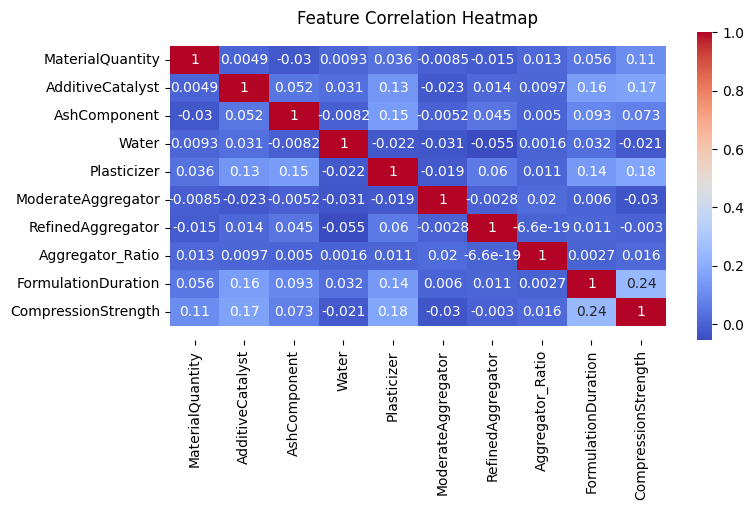

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

corr = data.corr()

plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
correlation_matrix = data.corr()

In [19]:
high_corr_columns = []
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[(correlation_matrix[col] > 0.6) & (correlation_matrix[col] < 1)]
    high_corr_columns.extend(correlated_cols)

In [20]:
high_corr_columns = list(set(high_corr_columns))

In [21]:
data.drop(columns=high_corr_columns)

,MaterialQuantity,AdditiveCatalyst,AshComponent,Water,Plasticizer,ModerateAggregator,RefinedAggregator,Aggregator_Ratio,FormulationDuration,CompressionStrength
0,0.684217,-0.128461,-1.255480,-0.547771,-0.146964,1.569387,-0.917180,-1.711100,1.515336,1.463677
1,-1.690804,0.473003,0.994856,-1.168004,-0.998353,0.945039,1.770596,0.533741,-1.330614,0.161067
2,1.178929,-1.472644,-0.016248,1.713048,-0.506901,0.268766,-0.006944,-38.705879,0.552617,1.332054
3,0.045295,1.160445,-0.500575,1.807521,0.103089,1.401555,0.622357,2.252013,0.292255,0.935241
4,0.067828,1.172241,1.114671,0.270831,-0.068227,1.024062,-0.271312,-3.774475,0.815595,1.215993
...,...,...,...,...,...,...,...,...,...,...
6041,-1.317769,-0.266842,0.406734,-1.465919,-0.158212,0.051275,1.701297,0.030139,1.636905,-0.434800
6042,-0.234245,0.709762,-0.480994,-0.871539,0.693178,-0.759759,1.726594,-0.440033,-0.651164,-0.199436
6043,-0.177611,-1.322467,-1.300256,-0.380571,1.479674,0.847163,-0.169502,-4.997956,1.139537,-0.048362
6044,0.407300,0.589833,0.902564,-0.786731,0.022622,-1.377409,0.192669,-7.149108,1.787693,0.057974


In [22]:
data.head()

,MaterialQuantity,AdditiveCatalyst,AshComponent,Water,Plasticizer,ModerateAggregator,RefinedAggregator,Aggregator_Ratio,FormulationDuration,CompressionStrength
0,0.684217,-0.128461,-1.255480,-0.547771,-0.146964,1.569387,-0.917180,-1.711100,1.515336,1.463677
1,-1.690804,0.473003,0.994856,-1.168004,-0.998353,0.945039,1.770596,0.533741,-1.330614,0.161067
2,1.178929,-1.472644,-0.016248,1.713048,-0.506901,0.268766,-0.006944,-38.705879,0.552617,1.332054
3,0.045295,1.160445,-0.500575,1.807521,0.103089,1.401555,0.622357,2.252013,0.292255,0.935241
4,0.067828,1.172241,1.114671,0.270831,-0.068227,1.024062,-0.271312,-3.774475,0.815595,1.215993


We tried the correlation technique but actually we can see that none of the columns get dropped so the columns are not highly correlated. 